In [9]:
#dependencies

import numpy as np
import matplotlib.pyplot as plt

from osgeo import gdal
import geopandas as gpd
import rasterio
from rasterio.plot import show
from shapely.geometry import box

## straight gdal method

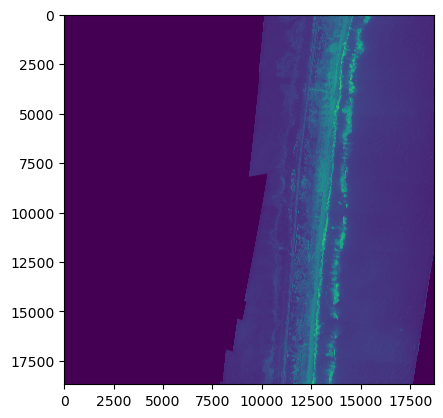

In [2]:
#load NOAA tiff
dataset = gdal.Open('../data/20180917a_RGB/20180917aC0753000w352830n.tif', gdal.GA_ReadOnly) # Note GetRasterBand() takes band no. starting from 1 not 0
band = dataset.GetRasterBand(1)
arr = band.ReadAsArray()
plt.imshow(arr)

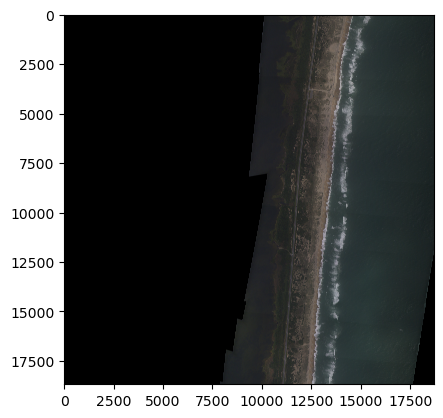

In [3]:
# since there are 3 bands
# we store in 3 different variables
band1 = dataset.GetRasterBand(1) # Red channel
band2 = dataset.GetRasterBand(2) # Green channel
band3 = dataset.GetRasterBand(3) # Blue channel

b1 = band1.ReadAsArray()
b2 = band2.ReadAsArray()
b3 = band3.ReadAsArray()

img = np.dstack((b1, b2, b3))
f = plt.figure()
plt.imshow(img)

## Rasterio method

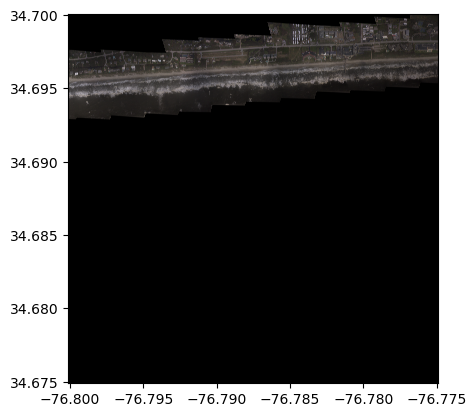

<AxesSubplot:>

In [23]:
#no buildings
#srcIm = rasterio.open('../data/20180917a_RGB/20180917aC0753000w352830n.tif')
#buildings (inland)
#srcIm = rasterio.open('../data/20180917a_RGB/20180917aC0790300w333600n.tif')
#buildings (island)
srcIm = rasterio.open('../data/20180917a_RGB/20180917aC0764800w344200n.tif')
show(srcIm)

## Building

In [6]:
bldg_file = '../data/NorthCarolina.geojson'

buildings_gpd = gpd.read_file(bldg_file)

In [24]:
#bounds from rasterio
# https://gis.stackexchange.com/questions/352445/make-shapefile-from-raster-bounds-in-python 

bounds  = srcIm.bounds
print(bounds)

bounds_box = box(*bounds)
print(bounds_box.wkt)

bounds_gpd=gpd.GeoDataFrame(geometry=[bounds_box])
bounds_gpd=bounds_gpd.set_crs('EPSG:4326')
print(bounds_gpd)

BoundingBox(left=-76.8001, bottom=34.6749, right=-76.7749, top=34.7001)
POLYGON ((-76.7749 34.6749, -76.7749 34.7001, -76.8001 34.7001, -76.8001 34.6749, -76.7749 34.6749))
                                            geometry
0  POLYGON ((-76.77490 34.67490, -76.77490 34.700...


In [25]:
json_clipped = gpd.clip(buildings_gpd, bounds_gpd)
json_clipped.set_crs('EPSG:4326')
print('MS data clipped to raster bounds and downloaded')
print(json_clipped)

MS data clipped to raster bounds and downloaded


In [32]:
json_clipped.to_file('../data/test.geojson', driver="GeoJSON")
#json_clipped.to_file('../data/testtest.shp')

In [43]:
#plot

In [46]:
json_clipped.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [48]:
json_clipped.head()

,release,capture_dates_range,geometry
2883921,1,,"POLYGON ((-76.78408 34.70007, -76.78404 34.700..."
2882664,1,,"POLYGON ((-76.78393 34.70008, -76.78389 34.700..."
2729694,1,,"POLYGON ((-76.79875 34.70000, -76.79897 34.699..."
2729683,1,,"POLYGON ((-76.79699 34.70009, -76.79720 34.700..."
2729395,1,,"POLYGON ((-76.78431 34.70009, -76.78439 34.700..."


<AxesSubplot:>

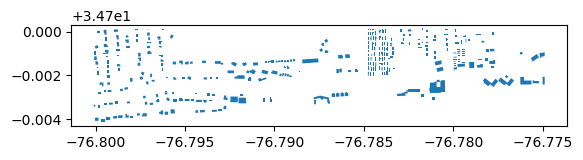

In [52]:
json_clipped.plot() 

In [ ]:
#overlay plots...